## Calculate the forcing at the top of the atmosphere(TOA) due to anthropogenic aerosols
### Data used: NorESM2

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
from forcing_NorESM2 import RadiativeFluxData

In [17]:
# Load netcdf data
if __name__ == '__main__':

    # create RadiativeFluxData class
    RFD = RadiativeFluxData()
    RFD.read()

In [18]:
#Compute the forcing at TOA (use same variables for the radiative fluxes- predefined in function)

balance_aer = RFD.rsdt_aer - RFD.rsut_aer - RFD.rlut_aer #difference between energy absorbed and radiated back; sim with anthro aerosols
balance_control = RFD.rsdt_c - RFD.rsut_c - RFD.rlut_c #control- without anthro aerosols

forcing_toa = -balance_control + balance_aer #difference between SW radiative flux at TOA with and without aerosols

Text(0.0, 1.0, 'Radiative Balance at TOA (without Aerosols)')

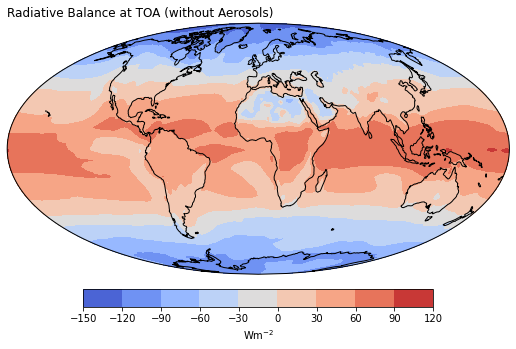

In [12]:
# Visualize simulated global historical data without anthropogenic aerosols
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
balance_control, RFD.lon = add_cyclic_point(balance_control, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(balance_control,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs,shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA (without Aerosols)", loc='left', fontsize=12)
plt.savefig("bal_control_TOA_NorESM2.pdf", bbox_inches='tight', transparent=True)

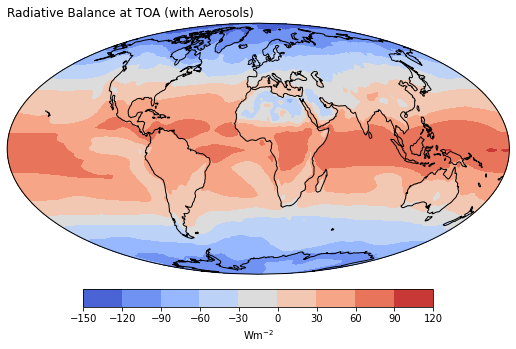

In [15]:
# Visualize simulated global historical data with anthropogenic aerosols
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax1.set_global()
ax1.coastlines()
balance_aer, RFD.lon = add_cyclic_point(balance_aer, coord=RFD.lon) #removes white longitutdinal line at centre
cs1 = ax1.contourf(RFD.lon,RFD.lat, np.mean(balance_aer,axis=0), transform=ccrs.PlateCarree(),cmap='coolwarm')
plt.colorbar(cs1, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Balance at TOA (with Aerosols)", loc='left', fontsize=12)
plt.savefig("bal_Aer_TOA_NorESM2.pdf", bbox_inches='tight', transparent=True)

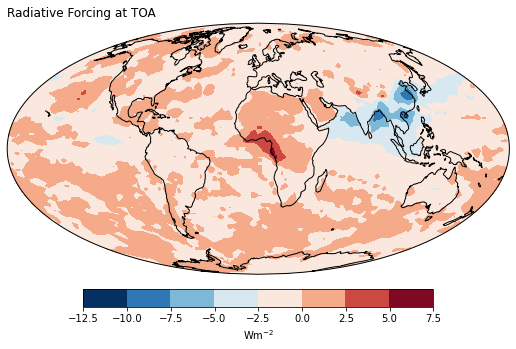

In [6]:
#Visualize radiaitve forcing at TOA
vmax = np.max(np.mean(forcing_toa,axis=0))
vmin = np.min(np.mean(forcing_toa,axis=0))
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
forcing_toa, RFD.lon = add_cyclic_point(forcing_toa, coord=RFD.lon) #removes white longitutdinal line at centre
cs = ax.contourf(RFD.lon,RFD.lat,np.mean(forcing_toa,axis=0),vmin=vmin,vmax=vmax, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=True, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal')
plt.title("Radiative Forcing at TOA", loc='left', fontsize = 12)
plt.savefig("forcing_TOA_NorESM2.pdf", bbox_inches='tight', transparent=True)